#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 19
**CH19A Food and health**

using the food-health dataset

version 1.0 2021-05-05

In [33]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import sys
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [34]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/food-health/clean/"
data_out = dirname + "da_case_studies/ch19-food-health"
output = dirname + "da_case_studies/ch19-food-health/output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [35]:
# Import the prewritten helper functions 
from py_helper_functions import *

___

In [36]:
data = pd.read_csv(data_in + "food-health.csv")

In [37]:
data

,seqn,food_code,days,grams,vitaminc,alcohol,caffeine,cholesterol,year,gramsm,...,bp_diastolic,total_cholesterol,hdl,weight,height,ldl,bmi,normal_weight,blood_pressure,heart_risk
0,51624.0,13110100.0,1.0,268.25,1.6,0.0,0.0,118.0,2009.0,142.817400,...,88.0,50.0,135.0,87.4,164.7,85.0,32.219903,0,202.0,287.0
1,51628.0,92410310.0,1.0,491.20,0.0,0.0,39.0,0.0,2009.0,500.116060,...,70.0,45.0,202.0,116.8,166.0,157.0,42.386413,0,224.0,381.0
2,51629.0,53106050.0,2.0,122.86,0.0,0.0,3.5,46.5,2009.0,118.094826,...,50.0,45.0,160.0,97.6,173.0,115.0,32.610512,0,152.0,267.0
3,51630.0,63101000.0,1.0,223.00,10.3,0.0,0.0,0.0,2009.0,156.844160,...,82.0,45.0,259.0,86.7,168.4,214.0,30.572779,0,200.0,414.0
4,51633.0,51300150.0,1.0,32.25,0.0,0.0,0.0,0.0,2009.0,67.798810,...,62.0,75.0,182.0,79.1,174.3,107.0,26.036446,0,204.0,311.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16479,83721.0,93401020.0,1.0,150.00,0.0,15.5,0.0,0.0,2013.0,248.777020,...,70.0,55.0,138.0,79.5,176.2,83.0,25.606801,0,178.0,261.0
16480,83723.0,58100125.0,1.0,278.00,3.6,0.0,0.0,33.0,2013.0,257.290000,...,NaN,49.0,186.0,99.5,173.5,137.0,33.054008,0,NaN,NaN
16481,83724.0,24201120.0,1.0,51.00,0.0,0.0,0.0,39.0,2013.0,97.344420,...,70.0,51.0,157.0,77.1,176.0,106.0,24.890238,1,234.0,340.0
16482,83727.0,54403020.0,1.0,88.00,0.0,0.0,0.0,0.0,2013.0,40.483818,...,68.0,55.0,190.0,71.8,171.3,135.0,24.468634,1,178.0,313.0


In [38]:
workfile = data.query("age>=30&age<60")

In [39]:
# new variables: 
  ## Fruit and vegetables per day (grams)
  ## Blood pressure (systolic+diastolic)

In [40]:
workfile = workfile.rename(columns={"veggies_n_fruits_gr":"fv","blood_pressure":"bp"})

In [41]:
workfile["fv"].describe()

count    7930.000000
mean      261.058836
std       285.358857
min         0.000000
25%        52.081874
50%       186.840000
75%       378.932500
max      5047.000000
Name: fv, dtype: float64

In [42]:
workfile["bp"].describe()

count    7360.000000
mean      193.708288
std        23.736936
min       129.000000
25%       178.000000
50%       192.000000
75%       208.000000
max       300.000000
Name: bp, dtype: float64

In [43]:
workfile = (
    workfile.loc[workfile["fv"] < 3200].dropna(subset=["bp"]).reset_index(drop=True)
)

In [44]:
# Days per week exercising
workfile["exerc"] = None
workfile.loc[workfile["paq655"] <= 7, "exerc"] = workfile["paq655"]
workfile.loc[workfile["paq650"] == 2, "exerc"] = 0
workfile["exerc"] = pd.to_numeric(workfile["exerc"])

In [45]:
# Potato chips per day, grams
workfile = workfile.rename(columns={"gr_potato_chips": "pchips"})

In [46]:
workfile = workfile.rename(columns={"gr_potato_chips": "pchips"})

### Descriptive table

In [47]:
workfile[["bp", "fv"]].describe().rename(
    columns={
        "bp": "Blood pressure (systolic+diastolic)",
        "fv": "Fruit and vegetables per day (grams)",
    }
).T.rename(columns={"50%": "median"}).drop(columns=["25%", "75%"])

,count,mean,std,min,median,max
Blood pressure (systolic+diastolic),7358.0,193.710111,23.739899,129.0,192.000,300.0
Fruit and vegetables per day (grams),7358.0,260.327774,274.372747,0.0,188.125,2740.0


### SCATTERPLOT AND REGRESSION LINE 

In [48]:
# Blood pressure vs amount of fruit and vegetables
reg = smf.ols("bp ~ fv", data=workfile).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     bp   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     15.47
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           8.44e-05
Time:                        20:36:21   Log-Likelihood:                -33736.
No. Observations:                7358   AIC:                         6.748e+04
Df Residuals:                    7356   BIC:                         6.749e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    194.7421      0.381    510.939      0.0

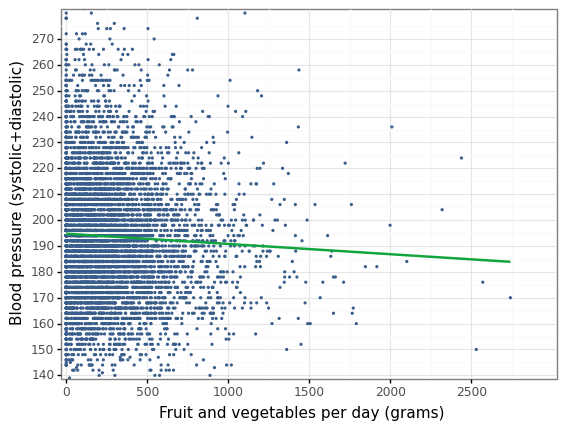

<ggplot: (310255095)>

In [49]:
# scatterplot and regression line
ggplot(workfile, aes(x="fv", y="bp")) + geom_point(
    size=0.3, alpha=0.5, color=color[0]
) + geom_smooth(method="lm", color=color[1], se=False) + theme_bw() + labs(
    x="Fruit and vegetables per day (grams)", y="Blood pressure (systolic+diastolic)"
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(140, 280, 10)
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 3000, 500)
) + coord_cartesian(
    ylim=(140, 280), xlim=(0, 3000), expand=True
)

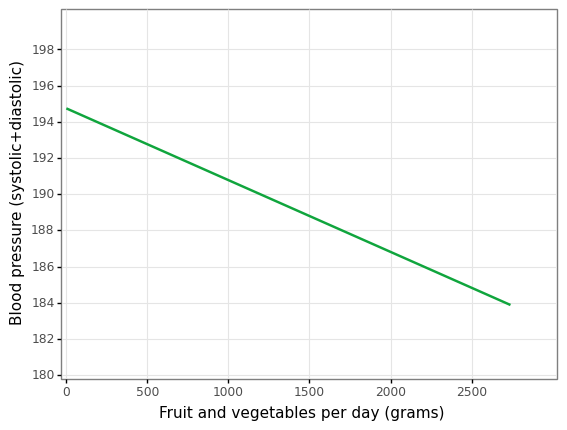

<ggplot: (310297847)>

In [50]:
# regression line only

ggplot(workfile, aes(x="fv", y="bp")) + geom_smooth(
    method="lm", se=False, color=color[1]
) + theme_bw() + labs(
    x="Fruit and vegetables per day (grams)", y="Blood pressure (systolic+diastolic)"
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(180, 200, 2), minor_breaks=None
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 3000, 500), minor_breaks=None
) + coord_cartesian(
    ylim=(180, 200), xlim=(0, 3000), expand=True
)

#### Log household income per capita vs fruit and vegetables per day,grams

In [51]:
# gen Log household income per capita
workfile["lninc"] = np.log(workfile["hh_income_percap"])

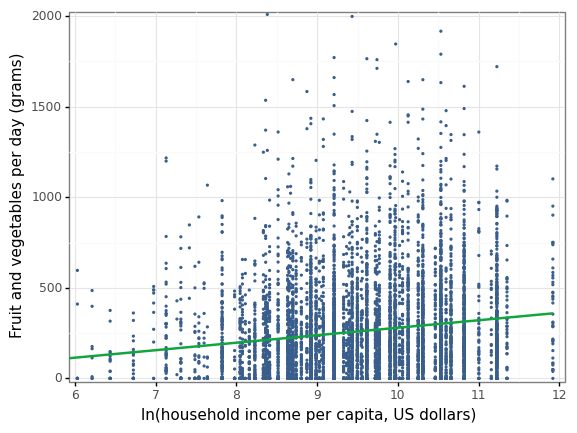

<ggplot: (310403566)>

In [52]:
# gen Log household income per capita
ggplot(workfile, aes(x="lninc", y="fv")) + geom_point(
    size=0.3, alpha=0.5, color=color[0]
) + geom_smooth(method="lm", se=False, color=color[1]) + theme_bw() + labs(
    x="ln(household income per capita, US dollars)",
    y="Fruit and vegetables per day (grams)",
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=(0, 500, 1000, 1500, 2000)
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=(6, 7, 8, 9, 10, 11, 12)
) + coord_cartesian(
    xlim=(6, 12), ylim=(0, 2000), expand=True
)

In [53]:
# Amount of fruit and vegetables per day, g (fv) vs Days per week vigorous recreational activities (exerc)
workfile.groupby("exerc").agg(tab_exerc=("year", "count"))

,tab_exerc
exerc,
0.0,5665
1.0,248
2.0,354
3.0,474
4.0,258
5.0,213
6.0,77
7.0,68


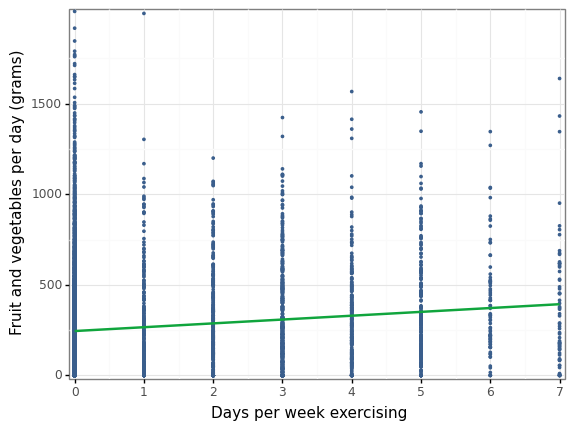

<ggplot: (310519799)>

In [54]:
ggplot(workfile.dropna(subset=["exerc"]), aes(x="exerc", y="fv")) + geom_point(
    size=0.5, alpha=0.5, color=color[0]
) + geom_smooth(method="lm", se=False, color=color[1]) + theme_bw() + labs(
    x="Days per week exercising", y="Fruit and vegetables per day (grams)"
) + scale_x_continuous(
    expand=(0.01, 0.01), breaks=(0, 1, 2, 3, 4, 5, 6, 7)
) + scale_y_continuous(
    expand=(0.01, 0.01), breaks=seq(0, 2000, 500)
) + coord_cartesian(
    xlim=(0, 7), ylim=(0, 2000), expand=True
)

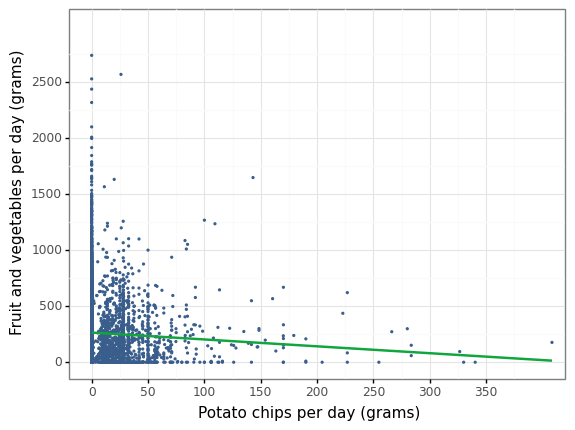

<ggplot: (310400820)>

In [55]:
# potato chips (potato_chips) and amount of fruit and vegetables per day (fv)
ggplot(workfile, aes(x="pchips", y="fv")) + geom_point(
    size=0.3, alpha=0.5, color=color[0]
) + geom_smooth(method="lm", se=False, color=color[1]) + theme_bw() + labs(
    x="Potato chips per day (grams)", y="Fruit and vegetables per day (grams)"
) + scale_x_continuous(
    breaks=seq(0, 400, 50)
) + scale_y_continuous(
    breaks=seq(0, 3000, 500)
) + coord_cartesian(
    xlim=(0, 400), ylim=(0, 3000), expand=True
)

In [56]:
reg1 = smf.ols("bp ~ fv", data=workfile).fit(cov_type="HC1")
reg2 = smf.ols("fv ~ lninc", data=workfile).fit(cov_type="HC1")
reg3 = smf.ols("fv ~ exerc", data=workfile).fit(cov_type="HC1")
reg4 = smf.ols("fv ~ pchips", data=workfile).fit(cov_type="HC1")

In [57]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["Intercept", "fv", "lninc", "exerc", "pchips"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 3"], [1, 1, 1, 1])
stargazer.show_model_numbers(False)
HTML(stargazer.render_html())